# DataVis HW3

In [1]:
import altair as alt
import pandas as pd 
import json
# This is to enable visualization rendering inside the notebook,
# similar to the inline instruction from matplotlib.
alt.renderers.enable('notebook')

## Read in + filter data

## Writing functions to read jason into data frame according to zipcode being called + creating a chart

In [8]:
# function for arranging data on called zipcode in a df

def dataPull(zipcode):
    """ 
    Function to read in restaurant data per zip from 
    Json file and convert to dataframe
    """
    # loading data
    data = json.load(open('nyc_restaurants_by_cuisine.json', 'r'))
    
    # Create empty array for storing data
    cuisine = []
    
    # Run function for specified zipcode to detrmine all cuisine types and number of restaurants
    for i in range(len(data)):
        
        # Try-except to ensure if the key does not exist for that zip a 0 value is pulled
        try:
            # Append array with actual value
            cuisine.append([data[i]['cuisine'], data[i]['perZip'][zipcode]])
        except KeyError:
            # Append array with 0
            cuisine.append([data[i]['cuisine'],0])


    # Store as dataframe
    zipdf = pd.DataFrame(cuisine, columns=['cuisine','perZip']).sort_values('perZip', ascending=False)[:15]
    
    # If incorrect zipcode, sum will be zero. To ensure empty plot is returned
    if zipdf.perZip.sum() == 0:
        zipdf = 0
    
    return zipdf

# chart of cuizines by zipcode

def createChart(data, zipcode):
    color_expression    = "highlight._vgsid_==datum._vgsid_"
    #color_condition     = alt.ConditionalPredicateValueDef(color_expression, "SteelBlue")
    highlight_selection = alt.selection_single(name="highlight", empty="all", on="mouseover")
    rating_selection    = alt.selection_single(name="rating", empty="all", encodings=['y'])
    maxCount            = int(data['restaurants'].max())

    barMean = alt.Chart() \
        .mark_bar(stroke="Black") \
        .encode(
            alt.X("mean(restaurants):Q", axis=alt.Axis(title="Restaurants")),
            alt.Y('cuisine:O', axis=alt.Axis(title="Cuisine"), 
                  sort=alt.SortField(field="restaurants", op="mean", order='descending')),
            alt.ColorValue("LightGrey"),#, condition=color_condition), # Remove color condition
        ).properties(
            width=200,
            height=350,
            selection = highlight_selection+rating_selection,
        )

    return alt.hconcat(barMean,
        data=data,
        title="Cuisines in {}".format(zipcode)
    )

In [9]:
dataPull('11215')

,cuisine,perZip
0,American,1296
5,Cafe/Coffee/Tea,337
4,Italian,326
1,Chinese,316
7,Japanese,248
6,Mexican,233
9,Bakery,214
11,Pizza/Italian,188
2,Pizza,179
3,Latin,128


In [5]:
# Here I just copy the JSON, and store it to task1_json.
# You could also directly fetch it from URL 
task1_json = """
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {
    "url": "https://raw.githubusercontent.com/hvo/datasets/master/nyc_restaurants_by_cuisine.json",
    "format": { "type": "json" }
  },
  "transform": [
    {"filter": "datum._vgsid_<=15"}
  ],
  "selection": {
    "search": {
      "bind": {
        "input": "input"
      },
      "empty": "none",
      "on": "mouseover",
      "fields": ["term"],
      "type": "single"
    },
    "highlight": {
      "type": "single",
      "on": "mouseover",
      "empty": "none"
    }
  },
  "mark": {
    "type": "bar",
    "stroke": "black"    
  },
  "encoding": {
    "color": {
      "condition": {
        "test": "(indexof(lower(datum.cuisine), lower(search.term))>=0) || (highlight._vgsid_==datum._vgsid_)",
        "value": "SteelBlue"
      },
      "value": "LightGrey"
    },
    "y": {
      "field": "cuisine",
      "type": "ordinal",
      "sort": {"field": "total", "op": "argmax"}
    },
    "x": {
      "field": "total",
      "type": "quantitative",
      "axis": {
      "title": "Restaurants"
      }
    }
  }
}
"""

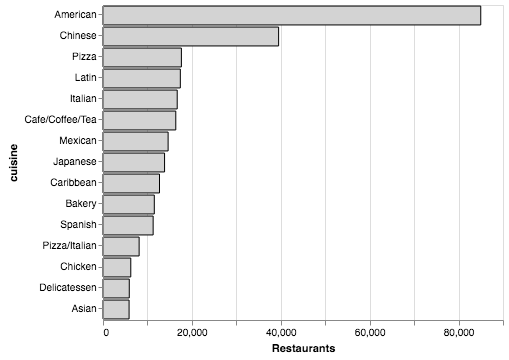

In [9]:
# Then we just create a chart using this JSON
alt.Chart.from_json(task1_json)